#**dataset from Bloomberg**


In [ ]:
!pip install mplfinance
!pip install pandas
!pip install ta
import numpy as np
import warnings
import pandas as pd
import mplfinance as mpf
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d0050f4b693a70ceddb6c2d37646c60ad695a771795667f86717ebc4ef693c08
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import os
from datetime import datetime
from time import sleep

# مسیر فایل
file_path_main = "/content/drive/MyDrive/files for colab/eftS&P500.csv"
# data cleaning for main stock
df_initial = pd.read_csv(file_path_main, sep=',', encoding='utf-8')
df_initial.columns = ["DateTime", "Open", "High", "Low", "Close", "Volume"]
df_initial


,DateTime,Open,High,Low,Close,Volume
0,06/03/2025 20:58,526.620,526.73,526.360,526.360,17793
1,06/03/2025 20:57,526.780,526.78,526.450,526.670,24261
2,06/03/2025 20:56,527.180,527.27,526.704,526.790,13043
3,06/03/2025 20:55,527.150,527.37,526.690,527.170,17871
4,06/03/2025 20:54,526.760,527.30,526.699,527.290,25856
...,...,...,...,...,...,...
53163,16/08/2024 14:34,507.148,507.20,506.990,507.200,25372
53164,16/08/2024 14:33,507.326,507.41,507.040,507.180,28402
53165,16/08/2024 14:32,507.050,507.29,507.050,507.260,11944
53166,16/08/2024 14:31,506.770,507.20,506.770,507.035,11157


In [ ]:
df_initial["DateTime"] = pd.to_datetime(df_initial["DateTime"], format="%d/%m/%Y %H:%M")

# Sort the DataFrame in ascending order (oldest first)
df_initial = df_initial.sort_values(by="DateTime", ascending=True)

# Reset the index (optional)
df_initial = df_initial.reset_index(drop=True)

# Display the sorted DataFrame
print(df_initial)

                 DateTime     Open    High      Low    Close  Volume
0     2024-08-16 14:30:00  506.840  507.27  506.650  506.650  110025
1     2024-08-16 14:31:00  506.770  507.20  506.770  507.035   11157
2     2024-08-16 14:32:00  507.050  507.29  507.050  507.260   11944
3     2024-08-16 14:33:00  507.326  507.41  507.040  507.180   28402
4     2024-08-16 14:34:00  507.148  507.20  506.990  507.200   25372
...                   ...      ...     ...      ...      ...     ...
53163 2025-03-06 20:54:00  526.760  527.30  526.699  527.290   25856
53164 2025-03-06 20:55:00  527.150  527.37  526.690  527.170   17871
53165 2025-03-06 20:56:00  527.180  527.27  526.704  526.790   13043
53166 2025-03-06 20:57:00  526.780  526.78  526.450  526.670   24261
53167 2025-03-06 20:58:00  526.620  526.73  526.360  526.360   17793

[53168 rows x 6 columns]


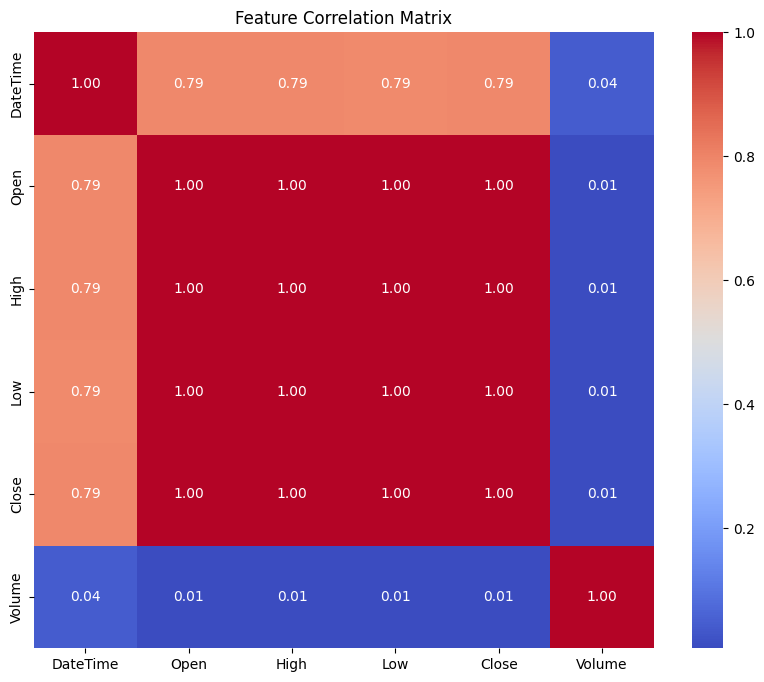

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_initial.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# مسیر فایل
file_path_main2024 = "/content/drive/MyDrive/files for colab/daily-treasury-rates-2024.csv"
file_path_main2025="/content/drive/MyDrive/files for colab/daily-treasury-rates-2025.csv"
# data cleaning for main stock
df_initial_Bond2024 = pd.read_csv(file_path_main2024, sep=',', encoding='utf-8')
df_initial_Bond2024.columns = ["Date","1.5 Month","2 Mo","3 Mo","4 Mo","6 Mo","1 Yr","2 Yr","3 Yr","5 Yr","7 Yr","10 Yr","20 Yr","30 Yr"]
df_initial_Bond2025 = pd.read_csv(file_path_main2025, sep=',', encoding='utf-8')
df_initial_Bond2025.columns = ["Date","1 Mo","1.5 Month","2 Mo","3 Mo","4 Mo","6 Mo","1 Yr","2 Yr","3 Yr","5 Yr","7 Yr","10 Yr","20 Yr","30 Yr"]



df_initial_Bond2024["Date"] = pd.to_datetime(df_initial_Bond2024["Date"], format="%m/%d/%Y")
df_initial_Bond2024 = df_initial_Bond2024.sort_values(by="Date", ascending=True)


df_initial_Bond2025["Date"] = pd.to_datetime(df_initial_Bond2025["Date"], format="%m/%d/%Y")
df_initial_Bond2025 = df_initial_Bond2025.sort_values(by="Date", ascending=True)




In [ ]:
df_initial_Bond2025.head()

,Date,1 Mo,1.5 Month,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
47,2025-01-02,4.45,NaN,4.36,4.36,4.31,4.25,4.17,4.25,4.29,4.38,4.47,4.57,4.86,4.79
46,2025-01-03,4.44,NaN,4.35,4.34,4.31,4.25,4.18,4.28,4.32,4.41,4.51,4.60,4.88,4.82
45,2025-01-06,4.43,NaN,4.36,4.35,4.31,4.24,4.17,4.28,4.30,4.42,4.52,4.62,4.91,4.85
44,2025-01-07,4.42,NaN,4.35,4.35,4.31,4.24,4.19,4.30,4.33,4.46,4.57,4.67,4.97,4.91
43,2025-01-08,4.41,NaN,4.34,4.35,4.31,4.25,4.19,4.28,4.31,4.45,4.56,4.67,4.97,4.91


In [ ]:
df_initial_Bond = pd.concat([df_initial_Bond2024[['Date', '10 Yr']], df_initial_Bond2025[['Date', '10 Yr']]], ignore_index=True)
df_initial_Bond.sort_values(by="Date", ascending=True, inplace=True)
df_initial_Bond.reset_index(drop=True, inplace=True)
print(df_initial_Bond)

          Date  10 Yr
0   2024-01-02   3.95
1   2024-01-03   3.91
2   2024-01-04   3.99
3   2024-01-05   4.05
4   2024-01-08   4.01
..         ...    ...
292 2025-03-06   4.29
293 2025-03-07   4.32
294 2025-03-10   4.22
295 2025-03-11   4.28
296 2025-03-12   4.32

[297 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np

# ✅ اطمینان از اینکه `DateTime` و `Date` به `datetime64[ns]` تبدیل شده‌اند
df_initial['DateTime'] = pd.to_datetime(df_initial['DateTime'])
df_initial_Bond['Date'] = pd.to_datetime(df_initial_Bond['Date'])

# ✅ استخراج `Date` بدون ساعت از `DateTime` و تبدیل به `datetime64`
df_initial['Date'] = df_initial['DateTime'].dt.date
df_initial['Date'] = pd.to_datetime(df_initial['Date'])  # اطمینان از اینکه `Date` هم `datetime64` باشد

# ✅ اتصال نرخ بهره روزانه به داده‌های دقیقه‌ای بر اساس `Date`
df_initial = df_initial.merge(df_initial_Bond, on='Date', how='left')

# ✅ تغییر نام ستون `10 Yr` به `r_daily`
df_initial.rename(columns={'10 Yr': 'r_daily'}, inplace=True)

# ✅ محاسبه نرخ بدون ریسک در هر دقیقه با فرمول داده‌شده
df_initial['Risk_Free_Rate'] = ((1 + df_initial['r_daily']) ** (1/1440)) - 1

# ✅ جایگذاری مقادیر `NaN` با `bfill` برای پر کردن مقادیر گمشده
df_initial['Risk_Free_Rate'].fillna(method='bfill', inplace=True)

# ✅ حذف ستون اضافی `Date`
df_initial.drop(columns=['Date', 'r_daily'], inplace=True)

# ✅ نمایش چند نمونه از خروجی
print(df_initial[['DateTime', 'Risk_Free_Rate']].head())


             DateTime  Risk_Free_Rate
0 2024-08-16 14:30:00        0.001103
1 2024-08-16 14:31:00        0.001103
2 2024-08-16 14:32:00        0.001103
3 2024-08-16 14:33:00        0.001103
4 2024-08-16 14:34:00        0.001103


In [ ]:
df_initial

In [ ]:
df_initial

In [ ]:
#df_initial['Bond_Close'].fillna(method='bfill', inplace=True)  # پر کردن مقادیر با مقدار بعدی


In [ ]:
nan_values = df_initial.isna().sum()
nan_values


,0
DateTime,0
Open,0
High,0
Low,0
Close,0
Volume,0
Risk_Free_Rate,0


Number of each day's data is 390 as below:

In [ ]:
print("Starting date: ", df_initial['DateTime'].iloc[0])
print("Ending date: ", df_initial['DateTime'].iloc[-1])

Starting date:  2024-08-16 14:30:00
Ending date:  2025-03-06 20:58:00


In [ ]:
import pandas as pd

# Sample data to mimic the provided DataFrame structure


# Convert DateTime column to datetime type for filtering
df_initial['DateTime'] = pd.to_datetime(df_initial['DateTime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Filter rows for 06 March 2025
march_6_data = df_initial[df_initial['DateTime'].dt.strftime('%d/%m/%Y') == '06/03/2025']
march_5_data = df_initial[df_initial['DateTime'].dt.strftime('%d/%m/%Y') == '05/03/2025']
# Count the rows for March 6, 2025
march_6_row_count = len(march_6_data)
march_5_data_count=len(march_5_data)
# Print the result
print(f"Number of rows for March 6, 2025: {march_6_row_count}, March 5, 2025 data: {march_5_data_count}")


Number of rows for March 6, 2025: 389, March 5, 2025 data: 390


In [ ]:
df_initial['Date'] = df_initial['DateTime'].dt.date
df_initial['Date'].shape

(53168,)

In [ ]:

# فرض بر این است که داده‌ها قبلاً در DataFrame به نام df بارگذاری شده‌اند
# ابتدا تاریخ را استخراج می‌کنیم و سپس تعداد ردیف‌ها را برای هر تاریخ محاسبه می‌کنیم


# محاسبه تعداد داده‌ها برای هر روز
daily_counts = df_initial['Date'].value_counts()

# نمایش نتایج برای روزهایی که تعداد داده‌ها برابر با 390 نیست
for date, count in daily_counts.items():
    if count != 390:
        print(f"Date: {date}, Data Count: {count}")



Date: 2024-10-03, Data Count: 389
Date: 2024-10-24, Data Count: 389
Date: 2024-09-13, Data Count: 389
Date: 2024-10-22, Data Count: 389
Date: 2024-10-02, Data Count: 389
Date: 2025-03-06, Data Count: 389
Date: 2024-10-08, Data Count: 388
Date: 2024-10-14, Data Count: 387
Date: 2024-10-28, Data Count: 332
Date: 2024-10-29, Data Count: 332
Date: 2024-10-31, Data Count: 332
Date: 2024-11-01, Data Count: 332
Date: 2024-10-30, Data Count: 331
Date: 2024-11-29, Data Count: 215
Date: 2024-12-24, Data Count: 215


In [ ]:
import pandas as pd

# فرض بر این است که داده‌ها قبلاً در DataFrame به نام df بارگذاری شده‌اند
df_initial = df_initial.dropna()
# محاسبه تعداد داده‌ها برای هر روز
daily_counts = df_initial['Date'].value_counts()

# شناسایی روزهایی که تعداد داده‌ها برابر با 390 نیست
dates_to_remove = [date for date, count in daily_counts.items() if count <= 387]
print(len(dates_to_remove))
# حذف داده‌های مربوط به این روزها از df
df = df_initial[~df_initial['Date'].isin(dates_to_remove)].copy()

# نمایش نتایج
print(f"DataFrame after removing days with counts not equal to 390: \n{df.head()}")


8
DataFrame after removing days with counts not equal to 390: 
             DateTime     Open    High     Low    Close  Volume  \
0 2024-08-16 14:30:00  506.840  507.27  506.65  506.650  110025   
1 2024-08-16 14:31:00  506.770  507.20  506.77  507.035   11157   
2 2024-08-16 14:32:00  507.050  507.29  507.05  507.260   11944   
3 2024-08-16 14:33:00  507.326  507.41  507.04  507.180   28402   
4 2024-08-16 14:34:00  507.148  507.20  506.99  507.200   25372   

   Risk_Free_Rate        Date  
0        0.001103  2024-08-16  
1        0.001103  2024-08-16  
2        0.001103  2024-08-16  
3        0.001103  2024-08-16  
4        0.001103  2024-08-16  


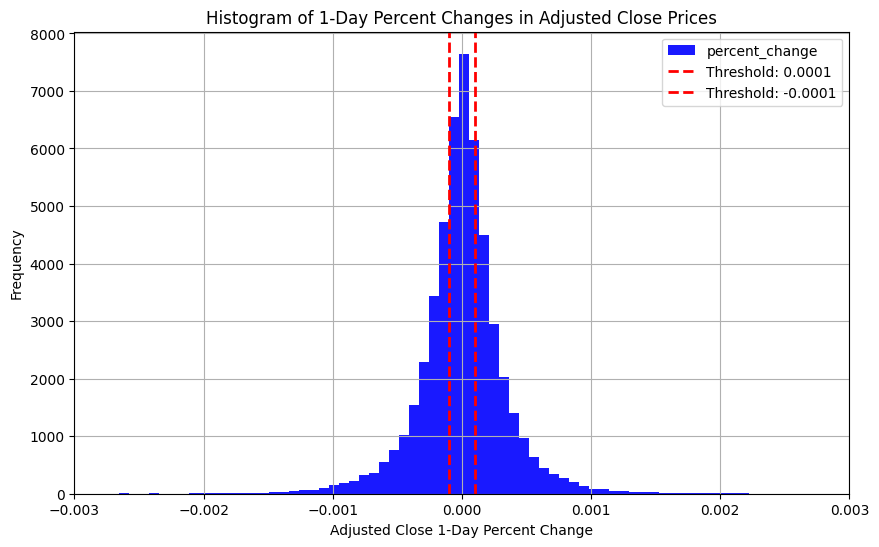

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض کنید df شامل داده‌های قیمت است و 'Close' ستون قیمت بسته شدن است.
# df = pd.read_csv("your_data.csv")  # اگر داده را از فایل بارگذاری می‌کنی

# محاسبه تغییرات درصدی روزانه
df["percent_change"] = df["Close"].pct_change()

# رسم هیستوگرام تغییرات درصدی قیمت بسته شدن
plt.figure(figsize=(10, 6))
df["percent_change"].plot.hist(bins=500, alpha=0.9, color="blue")

# تنظیمات نمودار
plt.xlabel("Adjusted Close 1-Day Percent Change")
plt.ylabel("Frequency")
plt.title("Histogram of 1-Day Percent Changes in Adjusted Close Prices")
plt.grid(True)
 # نمایش نمودار
plt.xlim(-0.003, 0.003)  # تنظیم محدوده محور X
plt.axvline(x=0.0001, color='red', linestyle='dashed', linewidth=2, label="Threshold: 0.0001")
plt.axvline(x=-0.0001, color='red', linestyle='dashed', linewidth=2, label="Threshold: -0.0001")
plt.legend()
plt.show()
df=df.drop(['percent_change'], axis=1)


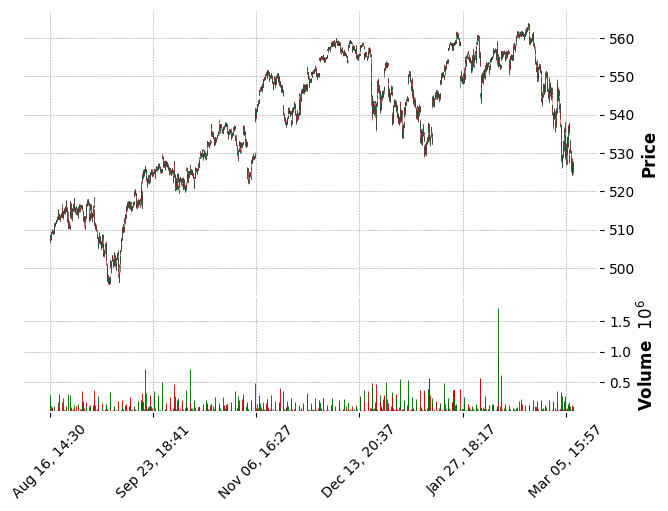

In [ ]:


import pandas as pd
import mplfinance as mpf

# Assuming you already have your DataFrame named df
# Make sure the index is datetime and columns are named exactly as required

# Example format: if 'Date' is a column and not the index:
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Now plot the candlestick chart
# First, make sure the date column exists and is in datetime format
df_plt=df.copy()
df_plt['DateTime'] = pd.to_datetime(df_plt['DateTime'])  # Change 'Date' to your actual date column name
df_plt.set_index('DateTime', inplace=True)

# Now try plotting again
mpf.plot(df_plt, type='candle', volume=True, style='charles')

In [ ]:
import ta

# EMA
df_plt['ema10'] = df_plt['Close'].ewm(span=10, adjust=False).mean()
df_plt['ema50'] = df_plt['Close'].ewm(span=50, adjust=False).mean()

# SMA
df_plt['sma10'] = ta.trend.sma_indicator(df_plt['Close'], window=10)
df_plt['sma50'] = ta.trend.sma_indicator(df_plt['Close'], window=50)

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates

# آماده‌سازی دیتا
df_month = df_plt.last('30D').copy()

# EMA محاسبه
df_month['ema10'] = df_month['Close'].ewm(span=10, adjust=False).mean()
df_month['ema50'] = df_month['Close'].ewm(span=50, adjust=False).mean()
df_month['signal'] = 0
df_month.loc[df_month['ema10'] > df_month['ema50'], 'signal'] = 1
df_month['position'] = df_month['signal'].diff()

# EMA خطوط اضافه
apdict = [
    mpf.make_addplot(df_month['ema10'], color='blue'),
    mpf.make_addplot(df_month['ema50'], color='orange')
]

# رسم کندل بدون حجم و گرفتن fig, ax
fig, axes = mpf.plot(
    df_month,
    type='candle',
    style='yahoo',
    addplot=apdict,
    volume=False,
    returnfig=True,
    figratio=(10, 6),
    figscale=1.2,
    title='EMA 10/50 Crossover with Buy/Sell Arrows'
)

ax = axes[0]

# تبدیل datetime index به matplotlib float dates
df_month['mpl_date'] = [mdates.date2num(d) for d in df_month.index]

# سیگنال‌ها
buy_signals = df_month[df_month['position'] == 1]
sell_signals = df_month[df_month['position'] == -1]

# فلش خرید (سبز)
for _, row in buy_signals.iterrows():
    ax.annotate('↑', xy=(row['mpl_date'], row['Low']*0.995),
                color='green', fontsize=16, ha='center', va='top', fontweight='bold')

# فلش فروش (قرمز)
for _, row in sell_signals.iterrows():
    ax.annotate('↓', xy=(row['mpl_date'], row['High']*1.005),
                color='red', fontsize=16, ha='center', va='bottom', fontweight='bold')

# ذخیره نمودار
fig.savefig('ema_crossover_with_arrows.png', dpi=300)
plt.close(fig)


In [ ]:
import matplotlib.pyplot as plt

# محاسبه EMA ها و سیگنال‌ها
df_month = df_plt.last('30D').copy()
df_month['ema10'] = df_month['Close'].ewm(span=10, adjust=False).mean()
df_month['ema50'] = df_month['Close'].ewm(span=50, adjust=False).mean()
df_month['signal'] = 0
df_month.loc[df_month['ema10'] > df_month['ema50'], 'signal'] = 1
df_month['position'] = df_month['signal'].diff()

# شروع رسم
plt.figure(figsize=(14, 7))
plt.plot(df_month.index, df_month['Close'], label='Close Price', alpha=0.6)
plt.plot(df_month.index, df_month['ema10'], label='EMA 10', color='blue', linewidth=1.5)
plt.plot(df_month.index, df_month['ema50'], label='EMA 50', color='orange', linewidth=1.5)

# فلش خرید (↑ سبز)
for idx, row in df_month[df_month['position'] == 1].iterrows():
    plt.annotate('↑', xy=(idx, row['Close']), color='green', fontsize=14, ha='center', va='bottom')

# فلش فروش (↓ قرمز)
for idx, row in df_month[df_month['position'] == -1].iterrows():
    plt.annotate('↓', xy=(idx, row['Close']), color='red', fontsize=14, ha='center', va='top')

plt.title('EMA 10/50 Crossover Signals (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ema_line_with_signals.png', dpi=300)
plt.close()


In [ ]:
#### ema candle chart
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# گرفتن دیتای یک‌ماهه
df_month = df_plt.last('1D').copy()

# محاسبه EMA و کراس‌اوور
df_month['ema10'] = df_month['Close'].ewm(span=10, adjust=False).mean()
df_month['ema50'] = df_month['Close'].ewm(span=50, adjust=False).mean()
df_month['signal'] = 0
df_month.loc[df_month['ema10'] > df_month['ema50'], 'signal'] = 1
df_month['position'] = df_month['signal'].diff()

# تبدیل index به تاریخ عددی (matplotlib float date)
df_month['mpl_date'] = df_month.index.map(mdates.date2num)

# آماده‌سازی EMAها برای plot
apdict = [
    mpf.make_addplot(df_month['ema10'], color='blue'),
    mpf.make_addplot(df_month['ema50'], color='orange')
]

# رسم اولیه‌ی نمودار کندل بدون volume
fig, axes = mpf.plot(
    df_month,
    type='candle',
    style='yahoo',
    addplot=apdict,
    volume=False,
    returnfig=True,
    figscale=1.2,
    figratio=(10,6),
    title="EMA 10/50 Crossover "
)



# ذخیره نهایی
fig.savefig("ema_crossover_final_with_arrows.png", dpi=300)
plt.close(fig)


In [ ]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# فرض: df_plt دیتای اصلی شماست و آماده است
# اگر آماده نیست باید اول دیتای OHLCV رو بارگذاری کنید

# گرفتن دیتای یک روز
df_day = df_plt.last('1D').copy()

# محاسبه‌ی RSI
delta = df_day['Close'].diff()
gain = delta.clip(lower=0).ewm(span=14, adjust=False).mean()
loss = (-delta.clip(upper=0)).ewm(span=14, adjust=False).mean()
rs = gain / loss
df_day['RSI'] = 100 - (100 / (1 + rs))

# تبدیل index به تاریخ عددی برای رسم
df_day['mpl_date'] = df_day.index.map(mdates.date2num)

# آماده‌سازی RSI برای اضافه شدن به چارت
apdict = [
    mpf.make_addplot(df_day['RSI'], panel=1, color='purple'),
]

# رسم نمودار کندل به همراه پنل جداگانه برای RSI
fig, axes = mpf.plot(
    df_day,
    type='candle',
    style='yahoo',
    addplot=apdict,
    volume=False,
    returnfig=True,
    figscale=1.2,
    figratio=(10,6),
    title="RSI with 30/70 Lines"
)

# اضافه کردن خطوط افقی 30 و 70 روی پنل RSI
rsi_ax = axes[2]  # پنل دوم که RSI روی اون کشیده شده
rsi_ax.axhline(y=70, color='red', linestyle='--', linewidth=1)
rsi_ax.axhline(y=30, color='green', linestyle='--', linewidth=1)

# ذخیره نهایی
fig.savefig("rsi_chart_with_30_70_lines.png", dpi=300)
plt.close(fig)


In [ ]:
#sma
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# گرفتن دیتای یک‌روزه (یا تغییر بده مثلاً '30D' برای بازه بزرگ‌تر)
df_month = df_plt.last('1D').copy()

# محاسبه SMA 10 و SMA 50
df_month['sma10'] = df_month['Close'].rolling(window=10).mean()
df_month['sma50'] = df_month['Close'].rolling(window=50).mean()
df_month['signal'] = 0
df_month.loc[df_month['sma10'] > df_month['sma50'], 'signal'] = 1
df_month['position'] = df_month['signal'].diff()

# تبدیل index به تاریخ عددی
df_month['mpl_date'] = df_month.index.map(mdates.date2num)

# آماده‌سازی خطوط SMA برای اضافه‌کردن به نمودار
apdict = [
    mpf.make_addplot(df_month['sma10'], color='blue', width=1.2),
    mpf.make_addplot(df_month['sma50'], color='yellow', width=1.2)
]

# رسم نمودار کندل بدون حجم
fig, axes = mpf.plot(
    df_month,
    type='candle',
    style='yahoo',
    addplot=apdict,
    volume=False,
    returnfig=True,
    figscale=1.2,
    figratio=(10,6),
    title="SMA 10/50 Crossover"
)

# ذخیره نهایی
fig.savefig("sma_crossover_candle_chart.png", dpi=300)
plt.close(fig)


In [ ]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# گرفتن دیتای یک‌ماهه
df_macd = df_plt.last('1D').copy()

# محاسبه EMAها و MACD
df_macd['EMA12'] = df_macd['Close'].ewm(span=12, adjust=False).mean()
df_macd['EMA26'] = df_macd['Close'].ewm(span=26, adjust=False).mean()
df_macd['MACD'] = df_macd['EMA12'] - df_macd['EMA26']
df_macd['Signal'] = df_macd['MACD'].ewm(span=9, adjust=False).mean()
df_macd['Hist'] = df_macd['MACD'] - df_macd['Signal']

# Addplot برای MACD و Signal line
ap_macd = [
    mpf.make_addplot(df_macd['MACD'], panel=1, color='blue', ylabel='MACD'),
    mpf.make_addplot(df_macd['Signal'], panel=1, color='orange'),
    mpf.make_addplot(df_macd['Hist'], panel=1, type='bar', color='dimgray', alpha=0.6)
]

# رسم MACD به‌همراه قیمت
mpf.plot(
    df_macd,
    type='candle',
    style='yahoo',
    addplot=ap_macd,
    volume=False,
    figscale=1.2,
    figratio=(10,6),
    title='Candlestick Chart with MACD Indicator',
    panel_ratios=(3,1),  # نسبت قیمت به MACD
    savefig='macd_candle_chart.png'
)


In [ ]:
import mplfinance as mpf
import pandas as pd

# گرفتن دیتای ۳۰ روزه
df_boll = df_plt.last('1D').copy()

# محاسبه Bollinger Bands
df_boll['SMA20'] = df_boll['Close'].rolling(window=20).mean()
df_boll['STD20'] = df_boll['Close'].rolling(window=20).std()
df_boll['Upper'] = df_boll['SMA20'] + 2 * df_boll['STD20']
df_boll['Lower'] = df_boll['SMA20'] - 2 * df_boll['STD20']

# تعریف خطوط اضافه
ap_boll = [
    mpf.make_addplot(df_boll['Upper'], color='green', width=1.2),
    mpf.make_addplot(df_boll['Lower'], color='red', width=1.2),
    mpf.make_addplot(df_boll['SMA20'], color='blue', width=1)
]

# رسم نمودار
mpf.plot(
    df_boll,
    type='candle',
    style='yahoo',
    addplot=ap_boll,
    volume=False,
    figscale=1.2,
    figratio=(10, 6),
    title='VOO Candlestick Chart with Bollinger Bands',
    savefig='bollinger_bands_chart.png'
)


In [ ]:

nan_values = df['DateTime'].isna().sum()

for index, row in df.iterrows():
    if pd.isna(row['DateTime']):
        print(row)
print(f"Number of NaN values in 'Date' column: {nan_values}")



Number of NaN values in 'Date' column: 0


In [ ]:
df


*    2024-08-16  20:59:00  14:30:00   first date
*   2025-03-06  20:59:00  14:30:00   last date





#data preprocess

In [ ]:
df=df.drop(['Date'], axis=1)


In [ ]:
df

In [ ]:
df.dtypes
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

print(df.dtypes)


DateTime          datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
Risk_Free_Rate           float64
dtype: object


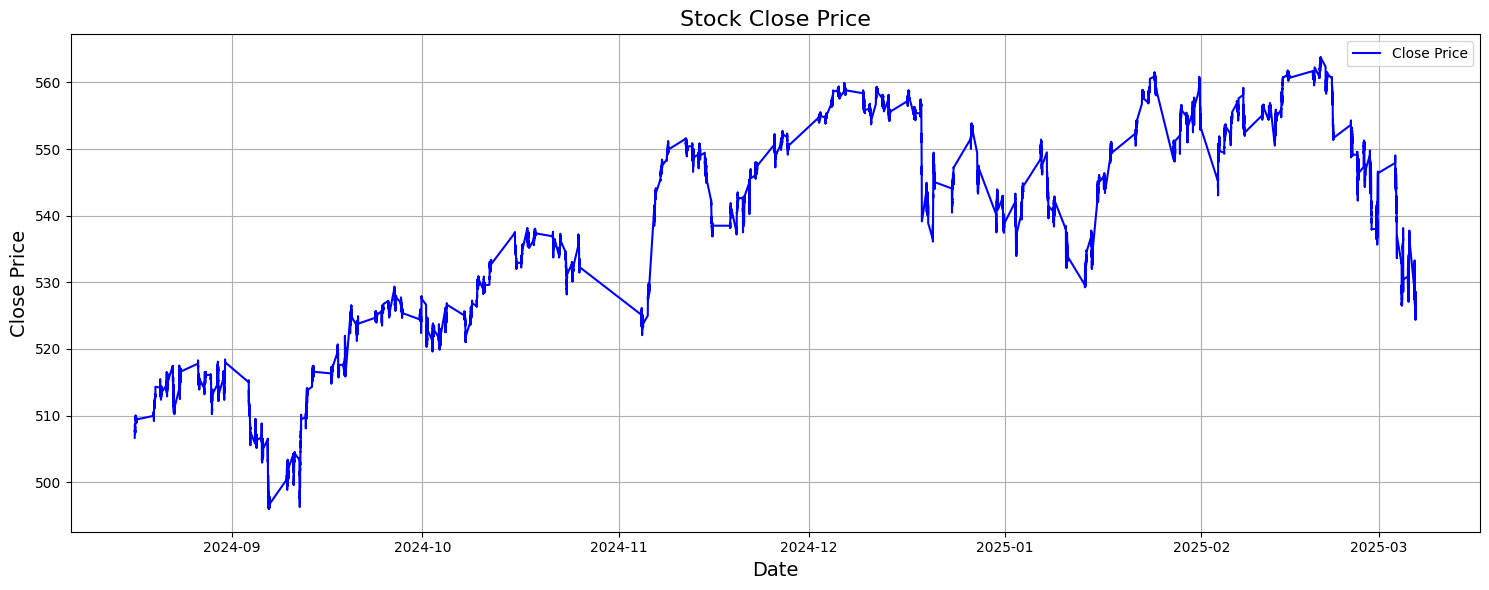

In [ ]:
import matplotlib.pyplot as plt

# مطمئن شوید که ستون تاریخ (DateTime) به datetime تبدیل شده باشد
df['DateTime'] = pd.to_datetime(df['DateTime'])

# مرتب‌سازی از قدیم به جدید
df = df.sort_values(by='DateTime')

# رسم نمودار قیمت Close
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Close'], label='Close Price', color='blue')

# تنظیمات نمودار
plt.title('Stock Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# نمایش نمودار
plt.show()


##spliting data to traing and test

In [ ]:
dd

In [ ]:
import mplfinance as mpf
dd=df.copy()
# Ensure DateTime is in the correct format
dd['DateTime'] = pd.to_datetime(dd['DateTime'])
dd.set_index('DateTime', inplace=True)

mpf.plot(dd, type='ohlc', volume=True, style='charles', title="OHLC Chart", savefig="ohlc_chart.png")


In [ ]:
summary_stats = df.describe().round(4)

# نمایش خلاصه آماری
summary_stats

,DateTime,Open,High,Low,Close,Volume,Risk_Free_Rate
count,50692,50692.0000,50692.0000,50692.0000,50692.0000,5.069200e+04,50692.0000
mean,2024-11-26 04:00:39.925826560,538.1372,538.2299,538.0383,538.1345,8.147087e+03,0.0011
min,2024-08-16 14:30:00,495.9400,496.0000,495.8000,495.9500,1.000000e+02,0.0011
25%,2024-10-02 17:43:45,525.3200,525.4000,525.2400,525.3300,2.503000e+03,0.0011
50%,2024-11-26 14:32:30,541.1300,541.2400,541.0000,541.1325,4.371500e+03,0.0012
75%,2025-01-17 17:45:15,552.7200,552.8020,552.6200,552.7200,7.755000e+03,0.0012
max,2025-03-06 20:58:00,563.8300,563.9200,563.8000,563.8300,1.727410e+06,0.0012
std,NaN,16.5542,16.5464,16.5626,16.5541,2.195515e+04,0.0000


In [ ]:
dff=df.copy()
#dff.drop('Bond_Close', axis=1, inplace=True)

dff["Date"] = dff["DateTime"].dt.date

# 4️⃣ مرتب‌سازی داده‌ها به ترتیب زمانی
dff = dff.sort_values(by="DateTime", ascending=True)

# 5️⃣ شمارش تعداد روزهای معاملاتی (یعنی تعداد روزهای یکتا)
dff["Trading_Day"] = dff["Date"].factorize()[0]  # هر روز معاملاتی یک عدد یکتا می‌گیرد

# 6️⃣ محاسبه شماره گروه‌های ۲۰ روزه (هر ۲۰ روز یک گروه جدید)
dff["Group"] = dff["Trading_Day"] // 20

# 7️⃣ تقسیم داده‌ها به Train (۸۰٪) و Test (۲۰٪)
train_df = dff[dff["Group"] < dff["Group"].max() * 0.8]  # ۸۰٪ اول داده‌ها
test_df = dff[dff["Group"] >= dff["Group"].max() * 0.8]  # ۲۰٪ آخر داده‌ها

# 8️⃣ نمایش تعداد داده‌های هر بخش
print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

Train size: 38993, Test size: 11699


In [ ]:
int(len(test_df)/390)+1,int(len(train_df)/390)+1

(30, 100)

In [ ]:
train_df.head()

,DateTime,Open,High,Low,Close,Volume,Risk_Free_Rate,Date,Trading_Day,Group
0,2024-08-16 14:30:00,506.840,507.27,506.65,506.650,110025.0,0.001103,2024-08-16,0,0
1,2024-08-16 14:31:00,506.770,507.20,506.77,507.035,11157.0,0.001103,2024-08-16,0,0
2,2024-08-16 14:32:00,507.050,507.29,507.05,507.260,11944.0,0.001103,2024-08-16,0,0
3,2024-08-16 14:33:00,507.326,507.41,507.04,507.180,28402.0,0.001103,2024-08-16,0,0
4,2024-08-16 14:34:00,507.148,507.20,506.99,507.200,25372.0,0.001103,2024-08-16,0,0


In [ ]:
test_df.tail()

#Begining of the analysis


In [ ]:
df_sim = dff.copy()


##ploting functions, feature enginnering function and data preprocess

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_model_analysis(feature, rf,  y_train_feat, y_train_pred, y_test_feat, y_test_pred,
                        train_r2, test_r2,test_rmse,test_mae, testDate):
    """
    این تابع تحلیل مدل را شامل نمودارهای:
    - Training Data: Actual vs Predicted
    - Training Residuals
    - Feature Importances
    - Testing Data: Actual vs Predicted
    - Testing Residuals
    - Time Series Prediction Comparison

    رسم می‌کند.

    پارامترها:
    - feature: نام فیچری که در مدل استفاده شده است
    - rf: مدل رندوم فارست آموزش داده شده
    - selected_features: لیست ویژگی‌های استفاده شده در مدل
    - y_train_feat: مقدار واقعی داده‌های آموزش
    - y_train_pred: مقدار پیش‌بینی شده داده‌های آموزش
    - y_test_feat: مقدار واقعی داده‌های تست
    - y_test_pred: مقدار پیش‌بینی شده داده‌های تست
    - train_r2: مقدار R² برای داده‌های آموزش
    - test_r2: مقدار R² برای داده‌های تست
    - testDate: دیتافریمی که شامل ستون `DateTime` برای رسم نمودار تایم‌سریز است.
    """

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"Model Analysis: RFR with OHLC + {feature}", fontsize=14)

    # **(1) Training: Actual vs Predicted**
    sns.scatterplot(x=y_train_feat, y=y_train_pred, color="blue", ax=axes[0, 0])
    sns.regplot(x=y_train_feat, y=y_train_pred, scatter=False, ax=axes[0, 0], color="red")
    axes[0, 0].plot(y_train_feat, y_train_feat, 'k--')
    axes[0, 0].set_title(f"Training Data: Actual vs Predicted\nR² = {train_r2:.6f}")

    # **(2) Training: Residuals**
    train_residuals = y_train_feat - y_train_pred
    sns.scatterplot(x=y_train_pred, y=train_residuals, color="blue", ax=axes[0, 1])
    axes[0, 1].axhline(y=0, color='black', linestyle='dashed')
    axes[0, 1].set_title("Training Data: Residuals")
    axes[0, 1].axhline(y=np.mean(train_residuals), color='red', linestyle='dashed', label="Mean Residual")
    axes[0, 1].axhline(y=np.mean(train_residuals) + 2*np.std(train_residuals), color='orange', linestyle='dotted', label="+2σ")
    axes[0, 1].axhline(y=np.mean(train_residuals) - 2*np.std(train_residuals), color='orange', linestyle='dotted', label="-2σ")
    axes[0, 1].set_xlabel("predicted prices")
    axes[0, 1].set_ylabel("Residuals")
    # **(3) Feature Importances**
    feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values()
    sns.barplot(x=feature_importances, y=feature_importances.index, ax=axes[0, 2])
    axes[0, 2].set_xlabel("Importance")
    axes[0, 2].set_ylabel("Features")
    axes[0, 2].set_title("Feature Importances")
    # اضافه کردن مقدار ویژگی‌ها روی نمودار
    for index, value in enumerate(feature_importances):
        axes[0, 2].text(value, index, f"{value:.4f}", va='center', fontsize=10, color='black')
    # نمایش نمودار
    plt.tight_layout()
    # **(4) Testing: Actual vs Predicted**
    sns.scatterplot(x=y_test_feat, y=y_test_pred, color="blue", ax=axes[1, 0])
    sns.regplot(x=y_test_feat, y=y_test_pred, scatter=False, ax=axes[1, 0], color="red")
    axes[1, 0].plot(y_test_feat, y_test_feat, 'k--')
    axes[1, 0].set_title(f"Testing Data: Actual vs Predicted\nR² = {test_r2:.6f}")
    axes[1, 0].set_xlabel("Actual")
    axes[1, 0].set_ylabel("Predicted")

    # **(5) Testing: Residuals**
    test_residuals = y_test_feat - y_test_pred
    sns.scatterplot(x=y_test_pred, y=test_residuals, color="blue", ax=axes[1, 1])
    axes[1, 1].axhline(y=0, color='black', linestyle='dashed')
    axes[1, 1].set_title("Testing Data: Residuals")
    axes[1, 1].set_title(f"Testing Data: Actual vs Predicted\nR² = {test_r2:.6f}")
    axes[1, 1].set_xlabel("Predicted")
    axes[1, 1].set_ylabel("Residuals")
    # **(6) Time Series Prediction Comparison**
    axes[1, 2].plot(testDate, y_test.values, label="Actual", color="blue")
    axes[1, 2].plot(testDate, y_test_pred, label="Predicted", color="red", linestyle="dashed")
    axes[1, 2].set_xlabel("DateTime")
    axes[1, 2].set_ylabel("Values")
    axes[1, 2].set_title("Time Series Prediction Comparison")
    axes[1, 2].legend()
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True)

    # 📌 **نمایش مقادیر RMSE، MAE و R²**
    plt.figtext(0.75, 0.2, f"RMSE: {test_rmse:.4f}\nMAE: {test_mae:.4f}\nR²: {test_r2:.4f}", fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
import pandas as pd




def preprocess_data(x_data, y_data, feature_engineering_func):
    """
    تابعی برای پیش‌پردازش داده‌های آموزشی و تست

    ورودی‌ها:
    - x_data: دیتافریم ویژگی‌ها (X_train یا X_test)
    - y_data: دیتافریم هدف (y_train یا y_test)
    - feature_engineering_func: تابعی برای محاسبه ویژگی‌های تکنیکال (Feature Engineering)

    خروجی‌ها:
    - x_data_processed: دیتافریم ویژگی‌های پردازش‌شده
    - y_data_processed: دیتافریم هدف پردازش‌شده
    """

    # ✅ اضافه کردن ویژگی‌های تکنیکال
    x_data = feature_engineering_func(x_data)

    # ✅ ریست کردن ایندکس برای جلوگیری از نامرتب شدن داده‌ها
    x_data = x_data.reset_index(drop=True)
    y_data = y_data.reset_index(drop=True)

    # ✅ هم‌راستا کردن y_data با x_data
    y_data = y_data.loc[x_data.index]

    # ✅ ریست مجدد ایندکس‌ها پس از هم‌راستا کردن
    x_data = x_data.reset_index(drop=True)
    y_data = y_data.reset_index(drop=True)

    # ✅ پر کردن داده‌های `NaN` به روش `ffill`
    y_data.fillna(method='ffill', inplace=True)
    x_data.fillna(method='ffill', inplace=True)

    # ✅ تنظیم `DateTime` به عنوان ایندکس
    if 'DateTime' in x_data.columns:
        x_data.set_index('DateTime', inplace=True)

    return x_data, y_data


import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    """
    تابعی برای محاسبه و نمایش معیارهای عملکرد مدل

    ورودی‌ها:
    - y_train: مقادیر واقعی در داده‌های آموزش
    - y_train_pred: مقادیر پیش‌بینی‌شده در داده‌های آموزش
    - y_test: مقادیر واقعی در داده‌های تست
    - y_test_pred: مقادیر پیش‌بینی‌شده در داده‌های تست

    خروجی‌ها:
    - metrics: دیکشنری شامل مقادیر محاسبه‌شده‌ی معیارهای عملکرد
    """

    # ✅ محاسبه R²، MSE، RMSE و MAE برای داده‌های آموزش و تست
    metrics = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # ✅ نمایش نتایج
    print("\n📊 **Model Performance Metrics** 📊")
    for key, value in metrics.items():
        print(f"{key}: {value:.6f}")

    return metrics



def simulate_portfolio(predicted_prices, actual_prices, initial_balance=10000, trade_fraction=0.004):
    """
    شبیه‌سازی عملکرد پورتفولیو بر اساس سیگنال‌های مدل

    ورودی‌ها:
    - predicted_prices: لیستی از قیمت‌های پیش‌بینی‌شده توسط مدل
    - actual_prices: لیستی از قیمت‌های واقعی سهم
    - initial_balance: مقدار اولیه سرمایه (پیش‌فرض 10,000 دلار)
    - trade_fraction: درصدی از کل سرمایه که در هر معامله استفاده می‌شود (پیش‌فرض 0.004 معادل 0.4%)

    خروجی‌ها:
    - cumulative_profit: لیستی از ارزش تجمعی پورتفولیو در طول زمان
    """
    initial_balance=10000
    # ✅ مقدار اولیه حساب
    balance = initial_balance
    position = 0  # تعداد سهم‌های در اختیار
    cumulative_profit = [balance]

    for i in range(len(actual_prices) - 1):
        portfolio_value = balance + (position * actual_prices[i])  # ارزش کل پورتفولیو
        max_trade_value = portfolio_value * trade_fraction  # مقدار حداکثری برای هر معامله
        price_change = (predicted_prices[i] - actual_prices[i]) / actual_prices[i]  # تغییر نسبی قیمت

        if abs(price_change) < 0.0001:  # اگر تغییر قیمت خیلی کم بود، معامله نکن
            cumulative_profit.append(cumulative_profit[-1])
            continue

        # ✅ خرید در صورت پیش‌بینی رشد قیمت
        if predicted_prices[i] > actual_prices[i] and balance > 0:
            num_shares_to_buy = max_trade_value / actual_prices[i]
            position += num_shares_to_buy
            balance -= num_shares_to_buy * actual_prices[i]

        # ✅ فروش در صورت پیش‌بینی کاهش قیمت
        elif predicted_prices[i] < actual_prices[i] and position > 0:
            num_shares_to_sell = min(position, max_trade_value / actual_prices[i])
            balance += num_shares_to_sell * actual_prices[i]
            position -= num_shares_to_sell

        # ✅ محاسبه ارزش جدید پورتفولیو
        current_value = balance + (position * actual_prices[i])
        cumulative_profit.append(current_value)

    return cumulative_profit



In [ ]:
df_sim=df.copy()

##raw


📊 **Model Performance Metrics** 📊
Train R²: 0.999850
Test R²: 0.994075
Train MSE: 0.039477
Test MSE: 0.476697
Train RMSE: 0.198687
Test RMSE: 0.690433
Train MAE: 0.107307
Test MAE: 0.357877


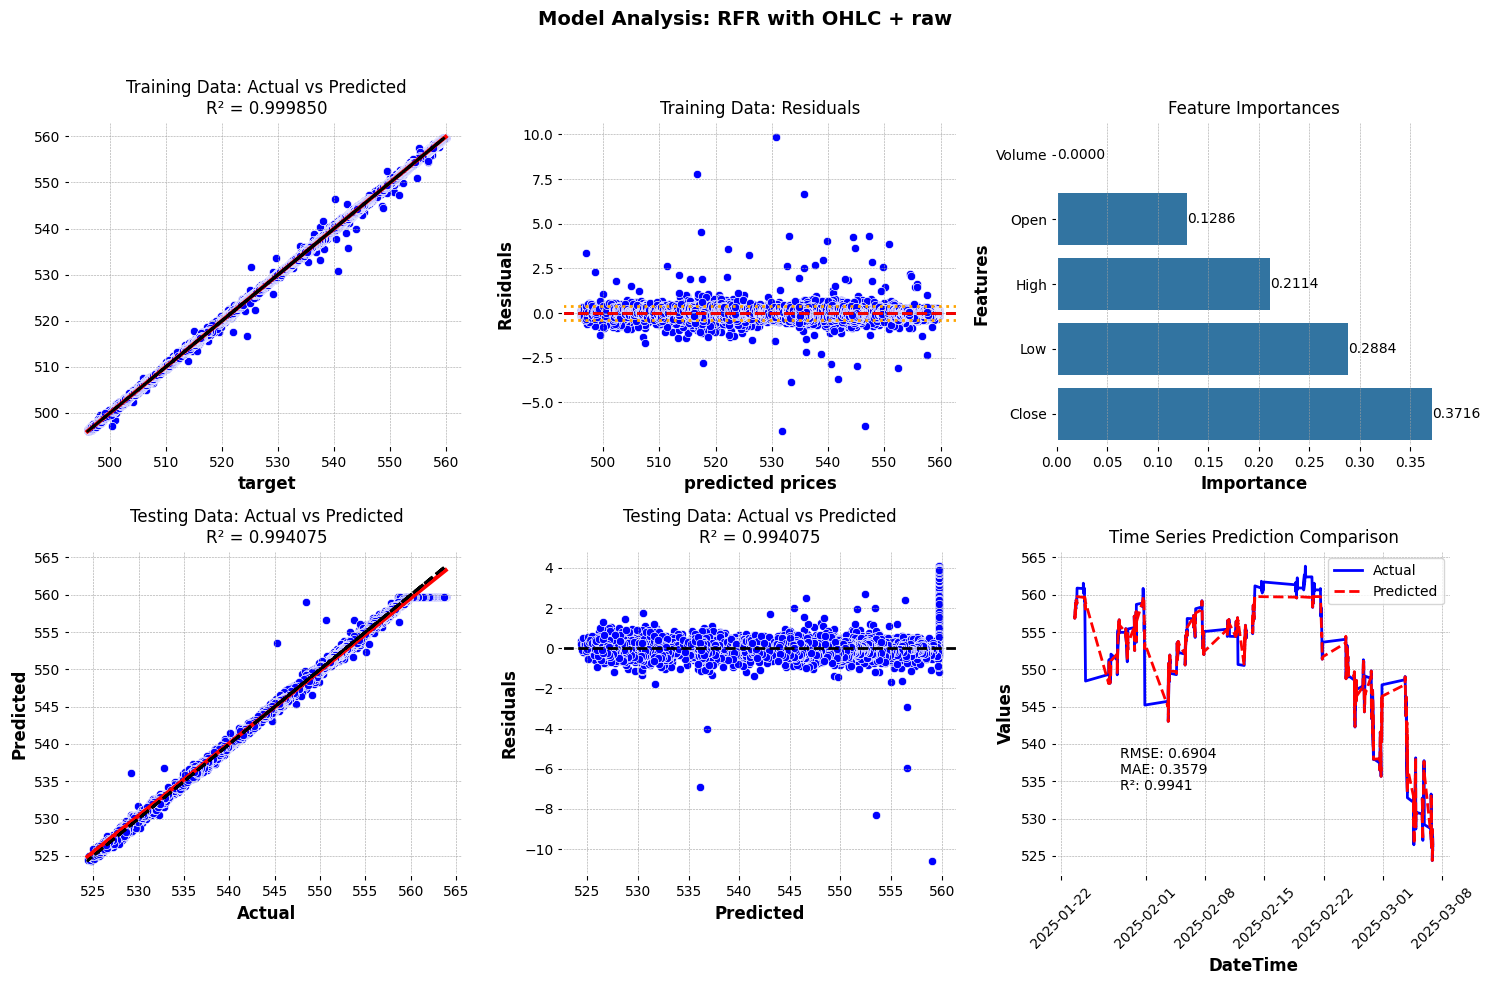

In [ ]:
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)


test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)



train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    df.fillna(method='bfill', inplace=True)
    return df

###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="raw",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)




#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_raw'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



In [ ]:
plt.plot(testDate, y_test.values, label="Actual", color="blue")
plt.plot(testDate, y_test_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("DateTime")
plt.ylabel("Values")
plt.title("Time Series Prediction Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##EMA10




📊 **Model Performance Metrics** 📊
Train R²: 0.999849
Test R²: 0.994049
Train MSE: 0.039524
Test MSE: 0.478766
Train RMSE: 0.198807
Test RMSE: 0.691929
Train MAE: 0.107073
Test MAE: 0.359384


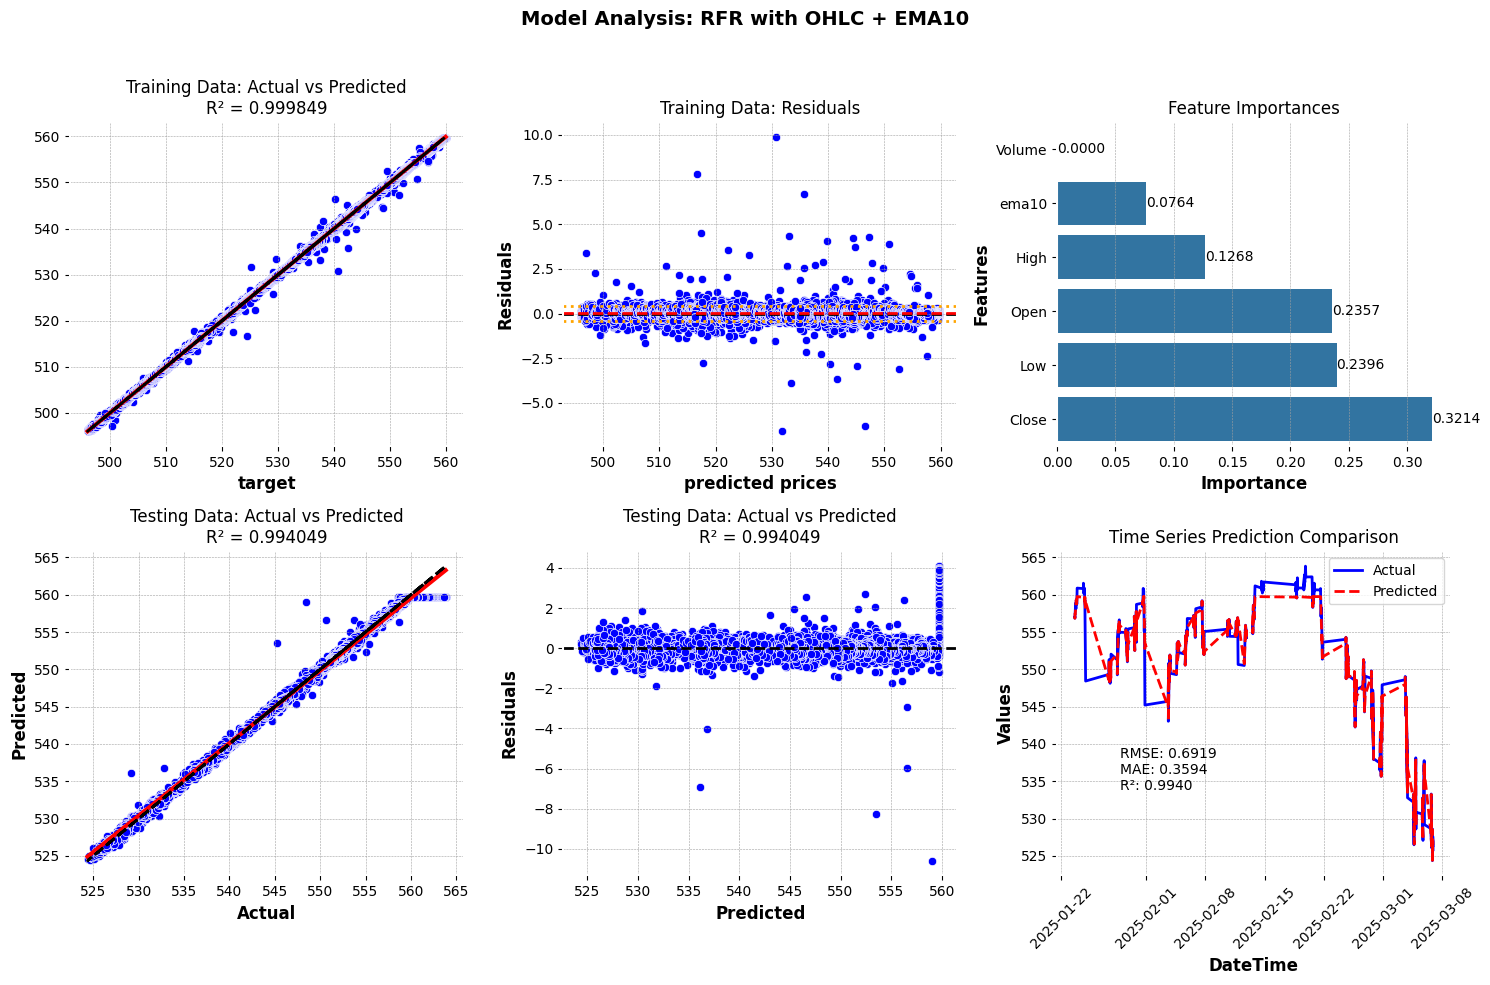

NameError: name 'df_sim' is not defined

In [ ]:
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    #  EMA: exponential Moving Averages
    df['ema10'] =  df['Close'].ewm(span=10, adjust=False).mean()
    df.fillna(method='bfill', inplace=True)
    return df

###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="EMA10",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_ema10'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



##ema50

In [ ]:
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    #  EMA: exponential Moving Averages
    df['ema50'] =  df['Close'].ewm(span=50, adjust=False).mean()
    df.fillna(method='bfill', inplace=True)
    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)
####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="raw",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)
df_sim['Portfolio_RandomForest_ema50'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



##sma10

In [ ]:
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    df['sma10'] = ta.trend.sma_indicator(df['Close'],window = 10)
    df.fillna(method='bfill', inplace=True)
    return df

###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="SMA10",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)
df_sim['Portfolio_RandomForest_sma10'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')


##sma50

In [ ]:
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    df['sma50'] = ta.trend.sma_indicator(df['Close'],window = 50)
    df.fillna(method='bfill', inplace=True)
    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="SMA50",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_sma50'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')


##RSI

In [ ]:

def feature_engineering(df):
    # RSI
    df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df.fillna(method='bfill', inplace=True)


    return df
# @title
#train["DateTime"] = pd.to_datetime(train["DateTime"], format="%d/%m/%Y %H:%M")
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta
    df['rsi'] = ta.trend.sma_indicator(df['Close'],window = 50)
    df.fillna(method='bfill', inplace=True)
    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="RSI",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_RSI'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



##macd

In [ ]:


# @title
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    # MACD Calculation
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['SIG'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Adjusted MACD Ratio (Consider revising formula if needed)
    df['R_MACD'] = (df['EMA12'] - df['EMA26']) / (0.5 * (df['MACD'].abs() - df['SIG'].abs() + 1e-9))  # Adding small constant to avoid division by zero

    # Drop unnecessary columns
    #df.drop(columns=["EMA26", "EMA12", "MACD", "SIG"], inplace=True)

    # Fill missing values (forward fill preferred)
    df.fillna(method='ffill', inplace=True)

    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="MACD",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['Date','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_MACD'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



In [ ]:
df_rf

In [ ]:
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)
x_train

##Bollinger band

In [ ]:
# @title
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)

dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):

    #Bollinger Bands
    # Define Bollinger Bands parameters
    N = 20  # Standard period
    # Calculate SMA (Moving Average)
    df["SMA"] = df["Close"].rolling(window=N).mean()
    # Calculate Standard Deviation
    df["STD"] = df["Close"].rolling(window=N).std()
    # Calculate Upper and Lower Bollinger Bands
    df["UBB"] = df["SMA"] + (2 * df["STD"])
    df["LBB"] = df["SMA"] - (2 * df["STD"])
    del df["STD"],  df["SMA"]
    df.fillna(method='bfill', inplace=True)
    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="BB",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_BB'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



##all features

In [ ]:
# @title
train=train_df.copy()
test=test_df.copy()
#test=test.sort_values(by="DateTime", ascending=True)
dummy=train.copy()
dummy2=test.copy()
test=test.sort_values(by="DateTime", ascending=True)
train=train.sort_values(by="DateTime", ascending=True)
train['target'] = train['Close'].shift(-1)
test['target'] = test['Close'].shift(-1)
x_train = train.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
test=test.sort_values(by="DateTime", ascending=True)
x_test = test.drop(['target','Date','Group','Trading_Day','Risk_Free_Rate'], axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

##############################################
def feature_engineering(df):
    import ta

    #  EMA: exponential Moving Averages
    df['ema10'] =  df['Close'].ewm(span=10, adjust=False).mean()
    df['ema50'] =  df['Close'].ewm(span=50, adjust=False).mean()
    df['sma10'] = ta.trend.sma_indicator(df['Close'],window = 10)
    df['sma50'] = ta.trend.sma_indicator(df['Close'],window = 50)
    df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    #Bollinger Bands
    # Calculate SMA (Moving Average)
    df["SMA"] = df["Close"].rolling(window=20).mean()
    # Calculate Standard Deviation
    df["STD"] = df["Close"].rolling(window=20).std()
    # Calculate Upper and Lower Bollinger Bands
    df["UBB"] = df["SMA"] + (2 * df["STD"])
    df["LBB"] = df["SMA"] - (2 * df["STD"])
    del df["STD"],  df["SMA"]
    # Calculate Bollinger Band %B
    #df["BB%"] = (df["Close"] - df["LBB"]) / (df["UBB"] - df["LBB"])


    # MACD

    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['MACD']=df['EMA12']-df['EMA26']
    df['SIG'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['R_MACD'] = (df['EMA12'] - df['EMA26'])/0.5*(df['MACD'].abs()-df['SIG'].abs())
    del df["EMA26"], df["EMA12"], df["MACD"], df["SIG"]
    df.fillna(method='bfill', inplace=True)
    return df
###############################################
x_train, y_train = preprocess_data(x_train, y_train, feature_engineering)
x_test, y_test = preprocess_data(x_test, y_test, feature_engineering)

####################################################
rfr=RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt',
                          min_samples_split=10,
                          min_samples_leaf=10,
                          max_depth=None)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#######################################
 # 📌 **1. Predict on training and testing data**
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
metrics_results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
# 📌 **4. Create subplots for visualization**
testDate=test.copy()
testDate.reset_index(drop=True,inplace=True)
testDate=testDate['DateTime']

plot_model_analysis(feature="Hybrid",rf=rfr,  y_train_feat=y_train,
    y_train_pred=y_train_pred, y_test_feat=y_test, y_test_pred=y_test_pred,
    train_r2=metrics_results.get("Train R²", "Key not found")
    , test_r2=metrics_results.get("Test R²", "Key not found"),
    test_rmse=metrics_results.get("Test RMSE", "Key not found"),
    test_mae=metrics_results.get("Test MAE", "Key not found"),
     testDate=testDate)

#######################################
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)
df_rf=feature_engineering(df_rf)
predicted_price = rfr.predict(df_rf)

cumulative_profit = simulate_portfolio(predicted_price, df_rf['Close'].values)

df_sim['Portfolio_RandomForest_hybrid'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')



##ANN

In [ ]:
df_rf=[]
df_rf=df.copy()
df_rf.drop(['DateTime','Risk_Free_Rate',], axis = 1,inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 🟢 **Feature Engineering Function**
def feature_engineering(df):
    import ta
    df = df.copy()

    df['ema10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['ema50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['sma10'] = ta.trend.sma_indicator(df['Close'], window=10)
    df['sma50'] = ta.trend.sma_indicator(df['Close'], window=50)
    df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()

    df["SMA"] = df["Close"].rolling(window=20).mean()
    df["STD"] = df["Close"].rolling(window=20).std()
    df["UBB"] = df["SMA"] + (2 * df["STD"])
    df["LBB"] = df["SMA"] - (2 * df["STD"])
    df.drop(["SMA", "STD"], axis=1, inplace=True)

    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['SIG'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['R_MACD'] = (df['EMA12'] - df['EMA26']) / (0.5 * (df['MACD'].abs() - df['SIG'].abs()))
    df.drop(["EMA26", "EMA12", "MACD", "SIG"], axis=1, inplace=True)

    df.fillna(method='bfill', inplace=True)

    return df

# 🟢 **Preprocessing Function**
def preprocess_data_ann(x_data, y_data, feature_engineering_func):
    x_data = feature_engineering_func(x_data)

    x_data = x_data.reset_index(drop=True)
    y_data = y_data.reset_index(drop=True)

    y_data = y_data.loc[x_data.index]

    x_data.fillna(method='ffill', inplace=True)
    y_data.fillna(method='ffill', inplace=True)

    return x_data, y_data

# 🟢 **Load Data & Feature Engineering**
df_ann = df.copy()
df_ann.drop(['DateTime', 'Risk_Free_Rate'], axis=1, inplace=True)

df_ann = feature_engineering(df_ann)
df_ann['Target'] = df_sim['Close'].shift(-1)
df_ann.dropna(inplace=True)

# 🟢 **Split Data**
X = df_ann.drop(columns=["Target"])
y = df_ann["Target"]

x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🟢 **Scale Data Properly**
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
x_train_ann_scaled = scaler_x.fit_transform(x_train_ann)
x_test_ann_scaled = scaler_x.transform(x_test_ann)

y_train_ann_scaled = scaler_y.fit_transform(y_train_ann.values.reshape(-1, 1)).flatten()
y_test_ann_scaled = scaler_y.transform(y_test_ann.values.reshape(-1, 1)).flatten()

# 🟢 **Build ANN Model**
model_ann = keras.Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(x_train_ann_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

model_ann.compile(optimizer='adam', loss='mse')

# 🟢 **Train ANN Model**
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_ann.fit(x_train_ann_scaled, y_train_ann_scaled, epochs=50, batch_size=16,
                        validation_data=(x_test_ann_scaled, y_test_ann_scaled),
                        callbacks=[early_stopping], verbose=1)

# 🟢 **Predict with ANN**
y_train_pred_ann_scaled = model_ann.predict(x_train_ann_scaled).flatten()
y_test_pred_ann_scaled = model_ann.predict(x_test_ann_scaled).flatten()
y_pred_ann_scaled=  model_ann.predict(X_scaled).flatten()
# Reverse Scaling for Real Values
y_train_pred_ann = scaler_y.inverse_transform(y_train_pred_ann_scaled.reshape(-1, 1)).flatten()
y_test_pred_ann = scaler_y.inverse_transform(y_test_pred_ann_scaled.reshape(-1, 1)).flatten()
y_pred_ann = scaler_y.inverse_transform(y_pred_ann_scaled.reshape(-1, 1)).flatten()
# 🟢 **Evaluate Model**




TrainR2= r2_score(y_train, y_train_pred)
TestR2=r2_score(y_test, y_test_pred)
TrainMSE= mean_squared_error(y_train, y_train_pred)
TestMSE= mean_squared_error(y_test, y_test_pred)
TrainRMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
TestRMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
TrainMAE= mean_absolute_error(y_train, y_train_pred)
TestMAE= mean_absolute_error(y_test, y_test_pred)

# 🟢 **Simulate ANN Trading Portfolio**
actual_prices_ann =y.values
predicted_prices_ann = y_pred_ann
initial_balance=10000
# ✅ مقدار اولیه حساب
balance = initial_balance
position = 0  # تعداد سهم‌های در اختیار
cumulative_profit = [balance]
trade_fraction=0.004
for i in range(len(actual_prices_ann) - 1):
    portfolio_value = balance + (position * actual_prices_ann[i])  # ارزش کل پورتفولیو
    max_trade_value = portfolio_value * trade_fraction  # مقدار حداکثری برای هر معامله
    price_change = (predicted_prices_ann[i] - actual_prices_ann[i]) / actual_prices_ann[i]  # تغییر نسبی قیمت

    if abs(price_change) < 0.005:  # اگر تغییر قیمت خیلی کم بود، معامله نکن
        cumulative_profit.append(cumulative_profit[-1])
        continue

    # ✅ خرید در صورت پیش‌بینی رشد قیمت
    if predicted_prices_ann[i] > actual_prices_ann[i] and balance > 0:
        num_shares_to_buy = max_trade_value / actual_prices_ann[i]
        position += num_shares_to_buy
        balance -= num_shares_to_buy * actual_prices_ann[i]

    # ✅ فروش در صورت پیش‌بینی کاهش قیمت
    elif predicted_prices_ann[i] < actual_prices_ann[i] and position > 0:
        num_shares_to_sell = min(position, max_trade_value / actual_prices_ann[i])
        balance += num_shares_to_sell * actual_prices_ann[i]
        position -= num_shares_to_sell

    # ✅ محاسبه ارزش جدید پورتفولیو
    current_value = balance + (position * actual_prices_ann[i])
    cumulative_profit.append(current_value)

#cumulative_profit = simulate_portfolio(predicted_prices_ann, actual_prices_ann)
df_sim['Portfolio_ANN'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



feature="ANN"
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Model Analysis: ANN with OHLC + {feature}", fontsize=14)


TrainR_2= r2_score(y_train, y_train_pred)
TestR_2 =r2_score(y_test, y_test_pred)
TrainMSE= mean_squared_error(y_train, y_train_pred)
TestMSE= mean_squared_error(y_test, y_test_pred)
TrainRMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
TestRMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
TrainMAE= mean_absolute_error(y_train, y_train_pred)
TestMAE= mean_absolute_error(y_test, y_test_pred)
# Printing the evaluation metrics in a structured format
print("Model Performance Metrics:")
print("-" * 40)
print(f"Train R² Score  : {TrainR_2:.4f}")
print(f"Test R² Score   : {TestR_2:.4f}")
print("-" * 40)
print(f"Train MSE       : {TrainMSE:.4f}")
print(f"Test MSE        : {TestMSE:.4f}")
print("-" * 40)
print(f"Train RMSE      : {TrainRMSE:.4f}")
print(f"Test RMSE       : {TestRMSE:.4f}")
print("-" * 40)
print(f"Train MAE       : {TrainMAE:.4f}")
print(f"Test MAE        : {TestMAE:.4f}")
print("-" * 40)

# **(1) Training: Actual vs Predicted**
sns.scatterplot(x=y_train, y=y_train, color="blue", ax=axes[0, 0])
sns.regplot(x=y_train, y=y_train_pred, scatter=False, ax=axes[0, 0], color="red")
axes[0, 0].plot(y_train, y_train, 'k--')
axes[0, 0].set_title(f"Training Data: Actual vs Predicted\nR² = {TrainR_2:.6f}")


train_residuals = y_train - y_train_pred
sns.scatterplot(x=y_train_pred, y=train_residuals, color="blue", ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='black', linestyle='dashed')
axes[0, 1].set_title("Training Data: Residuals")
axes[0, 1].axhline(y=np.mean(train_residuals), color='red', linestyle='dashed', label="Mean Residual")
axes[0, 1].axhline(y=np.mean(train_residuals) + 2*np.std(train_residuals), color='orange', linestyle='dotted', label="+2σ")
axes[0, 1].axhline(y=np.mean(train_residuals) - 2*np.std(train_residuals), color='orange', linestyle='dotted', label="-2σ")
axes[0, 1].set_xlabel("Predicted Prices")
axes[0, 1].set_ylabel("Residuals")




sns.scatterplot(x=y_test , y=y_test_pred, color="blue", ax=axes[1, 0])
sns.regplot(x=y_test, y=y_test_pred, scatter=False, ax=axes[1, 0], color="red")
axes[1, 0].plot(y_test, y_test, 'k--')
axes[1, 0].set_title(f"Testing Data: Actual vs Predicted\nR² = {TestR_2:.6f}")
axes[1, 0].set_xlabel("Actual")
axes[1, 0].set_ylabel("Predicted")





# **(4) Testing: Residuals**
test_residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=test_residuals, color="blue", ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='black', linestyle='dashed')
axes[1, 1].set_title("Testing Data: Residuals")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Residuals")





# **(6) Time Series Prediction Comparison**
axes[1, 2].plot(testDate, y_test.values, label="Actual", color="blue")
axes[1, 2].plot(testDate, y_test_pred, label="Predicted", color="red", linestyle="dashed")
axes[1, 2].set_xlabel("DateTime")
axes[1, 2].set_ylabel("Values")
axes[1, 2].set_title("Time Series Prediction Comparison")
axes[1, 2].legend()
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True)




In [ ]:
# 📈 رسم نمودار مقایسه‌ای

"""

# 🟢 **Simulate ANN Trading Portfolio**
actual_prices_ann =y.values
predicted_prices_ann = y_pred_ann
initial_balance=10000
# ✅ مقدار اولیه حساب
balance = initial_balance
position = 0  # تعداد سهم‌های در اختیار
cumulative_profit = [balance]
trade_fraction=0.004
for i in range(len(actual_prices_ann) - 1):
    portfolio_value = balance + (position * actual_prices_ann[i])  # ارزش کل پورتفولیو
    max_trade_value = portfolio_value * trade_fraction  # مقدار حداکثری برای هر معامله
    price_change = (predicted_prices_ann[i] - actual_prices_ann[i]) / actual_prices_ann[i]  # تغییر نسبی قیمت

    if abs(price_change) < 0.005:  # اگر تغییر قیمت خیلی کم بود، معامله نکن
        cumulative_profit.append(cumulative_profit[-1])
        continue

    # ✅ خرید در صورت پیش‌بینی رشد قیمت
    if predicted_prices_ann[i] > actual_prices_ann[i] and balance > 0:
        num_shares_to_buy = max_trade_value / actual_prices_ann[i]
        position += num_shares_to_buy
        balance -= num_shares_to_buy * actual_prices_ann[i]

    # ✅ فروش در صورت پیش‌بینی کاهش قیمت
    elif predicted_prices_ann[i] < actual_prices_ann[i] and position > 0:
        num_shares_to_sell = min(position, max_trade_value / actual_prices_ann[i])
        balance += num_shares_to_sell * actual_prices_ann[i]
        position -= num_shares_to_sell

    # ✅ محاسبه ارزش جدید پورتفولیو
    current_value = balance + (position * actual_prices_ann[i])
    cumulative_profit.append(current_value)

#cumulative_profit = simulate_portfolio(predicted_prices_ann, actual_prices_ann)
df_sim['Portfolio_ANN'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 6))
df_sim['DateTime'] = df['DateTime'].copy()


plt.plot(df_sim['DateTime'], df_sim['Portfolio_ANN'], label=s)

plt.axhline(y=initial_balance, color='black', linestyle="--", label="Initial Balance ($10,000)")
plt.xlabel("DateTime")
plt.ylabel("Portfolio Value ($)")
plt.title("Performance Comparison of Trading Strategies")
plt.xticks(rotation=45)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
plt.grid(True)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame
dummy = pd.DataFrame({
    "actual_prices_ann": y,
    "predicted_prices_ann": y_pred_ann
})

# Compute percentage price change
dummy["price_change"] = (dummy["predicted_prices_ann"] - dummy["actual_prices_ann"]) / dummy["actual_prices_ann"] * 100

# Plot
plt.figure(figsize=(10, 5))
plt.plot(dummy.index, dummy["price_change"], marker='o', linestyle='-', label="Price Change (%)")

# Formatting
plt.axhline(y=0, color='r', linestyle='--', label="Baseline (0%)")
plt.xlabel("Index")
plt.ylabel("Price Change (%)")
plt.title("Predicted vs Actual Price Change (%)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
dummy["price_change"].plot.hist(bins=500, alpha=0.9, color="blue")

# Chart formatting
plt.xlabel("Adjusted Close 1-Day Percent Change")
plt.ylabel("Frequency")
plt.title("Histogram of 1-Day Percent Changes in Adjusted Close Prices")
plt.grid(True)

# Setting x-axis limits
#plt.xlim(-0.003, 0.003)

# Adding threshold lines
plt.axvline(x=0.0001, color='red', linestyle='dashed', linewidth=2, label="Threshold: 0.0001")
plt.axvline(x=-0.0001, color='red', linestyle='dashed', linewidth=2, label="Threshold: -0.0001")
plt.legend()

# Show the plot
plt.show()


"""

In [ ]:
# 🟢 **Feature Engineering Function**
def feature_engineering(df):
    import ta
    df = df.copy()

    df['ema10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['ema50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['sma10'] = ta.trend.sma_indicator(df['Close'], window=10)
    df['sma50'] = ta.trend.sma_indicator(df['Close'], window=50)
    df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()

    df["SMA"] = df["Close"].rolling(window=20).mean()
    df["STD"] = df["Close"].rolling(window=20).std()
    df["UBB"] = df["SMA"] + (2 * df["STD"])
    df["LBB"] = df["SMA"] - (2 * df["STD"])
    df.drop(["SMA", "STD"], axis=1, inplace=True)

    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['SIG'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['R_MACD'] = (df['EMA12'] - df['EMA26']) / (0.5 * (df['MACD'].abs() - df['SIG'].abs()))


    df.fillna(method='bfill', inplace=True)

    return df
df_sim=feature_engineering(df_sim)

#Drawing actual price predicted price

#Conclusion

##portfolio and drawdown comparison

In [ ]:
df_rf=df.copy()
df_rf

In [ ]:
df_sim.columns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🟢 محاسبه نرخ بدون ریسک با log return
# مقدار اولیه حساب
initial_balance = 10000



# 🟢 محاسبه بازده روزانه (log return)
df_sim['Daily Return'] = np.log(df_sim['Close'] / df_sim['Close'].shift(1))
df_sim['Daily Return'].fillna(0, inplace=True)
# 🟢 اضافه کردن استراتژی Buy and Hold
df_sim['Portfolio_Buy_and_Hold'] = initial_balance * (1 + df_sim['Daily Return']).cumprod()
# تعریف استراتژی‌های معاملاتی
strategies = {
    "ema": {"buy": df_sim['ema10'] > df_sim['ema50'], "sell": df_sim['ema10'] < df_sim['ema50']},
    "sma": {"buy": df_sim['sma10'] > df_sim['sma50'], "sell": df_sim['sma10'] < df_sim['sma50']},
    "MACD": {"buy": df_sim['MACD'] > df_sim['SIG'], "sell": df_sim['MACD'] < df_sim['SIG']},
    "rsi": {"buy": df_sim['rsi'] < 20, "sell": df_sim['rsi'] > 80},
    "BB": {"buy": df_sim['Close'] < df_sim['LBB'], "sell": df_sim['Close'] > df_sim['UBB']},

}

# اجرای استراتژی‌ها
for strat, signals in strategies.items():
    df_sim[f'Signal_{strat}'] = 0
    df_sim.loc[signals['buy'], f'Signal_{strat}'] = 1
    df_sim.loc[signals['sell'], f'Signal_{strat}'] = -1
    df_sim[f'Return_{strat}'] = df_sim[f'Signal_{strat}'].shift(1) * df_sim['Daily Return']
    df_sim[f'Return_{strat}'].fillna(0, inplace=True)
    df_sim[f'Portfolio_{strat}'] = initial_balance * (1 + df_sim[f'Return_{strat}']).cumprod()

# 🟢 اجرای استراتژی رگرسور جنگل تصادفی
df_rf = dff.copy()
df_rf = df_rf.sort_values(by="DateTime", ascending=True)
df_rf = df_rf.drop(['Date', 'Group', 'Trading_Day', 'DateTime','Risk_Free_Rate'], axis=1)
df_rf = feature_engineering(df_rf)
"""
predicted_price = rfr.predict(df_rf)
balance = initial_balance
position = 0
cumulative_profit = [balance]

actual_prices = df_rf['Close'].values

for i in range(len(actual_prices) - 1):
    portfolio_value = balance + (position * actual_prices[i])
    max_trade_value = portfolio_value * 0.004
    price_change = (predicted_price[i] - actual_prices[i]) / actual_prices[i]  # ✅ اصلاح محاسبه تغییر قیمت

    if abs(price_change) < 0.0001:
        cumulative_profit.append(cumulative_profit[-1])
        continue

    # ✅ استفاده از predicted_price[i] به جای predicted_price[i + 1]
    if predicted_price[i] > actual_prices[i] and balance > 0:
        num_shares_to_buy = max_trade_value / actual_prices[i]
        position += num_shares_to_buy
        balance -= num_shares_to_buy * actual_prices[i]

    elif predicted_price[i] < actual_prices[i] and position > 0:
        num_shares_to_sell = min(position, max_trade_value / actual_prices[i])
        balance += num_shares_to_sell * actual_prices[i]
        position -= num_shares_to_sell

    current_value = balance + (position * actual_prices[i])
    cumulative_profit.append(current_value)

# 🟢 اطمینان از هم‌راستا بودن `cumulative_profit`
df_sim['Portfolio_RandomForest'] = pd.Series(cumulative_profit).reindex(df_sim.index, method='ffill')
"""
############################################################################
# neeeeeeeeeed to add rf models here########################################
############################################################################
# 🟢 اضافه کردن Buy and Hold به تحلیل استراتژی‌ها
strategy_names = [f'Portfolio_{s}' for s in strategies.keys()] + ['Portfolio_Buy_and_Hold'
       , 'Portfolio_RandomForest_ema10',
       'Portfolio_RandomForest_ema50', 'Portfolio_RandomForest_sma10',
       'Portfolio_RandomForest_sma50', 'Portfolio_RandomForest_RSI',
       'Portfolio_RandomForest_BB', 'Portfolio_RandomForest_MACD',
       'Portfolio_RandomForest_hybrid', 'Portfolio_RandomForest_raw', 'Portfolio_ANN']
# 🟢 محاسبه بازده تجمعی
cumulative_returns = {s: (df_sim[s].iloc[-1] / df_sim[s].iloc[0]) - 1 for s in strategy_names}
####################################Ann





######################################
# 🟢 محاسبه Max Drawdown
def max_drawdown(portfolio):
    running_max = np.maximum.accumulate(portfolio)
    drawdown = (portfolio - running_max) / running_max
    return np.min(drawdown)

mdd_results = {s: max_drawdown(df_sim[s]) for s in strategy_names}

# 🟢 محاسبه نسبت شارپ
sharpe_ratios = {}
for s in strategy_names:
    excess_returns = df_sim[s].pct_change().fillna(0) - df_sim['Risk_Free_Rate']
    sharpe_ratios[s] = excess_returns.mean() / excess_returns.std()

# 🟢 محاسبه نسبت سورتینو
sortino_ratios = {}
for s in strategy_names:
    excess_returns = df_sim[s].pct_change().fillna(0) - df_sim['Risk_Free_Rate']
    downside_std = excess_returns[excess_returns < 0].std()
    sortino_ratios[s] = excess_returns.mean() / downside_std

# 📌 نمایش نتایج عددی
print("\n📈 Cumulative Returns:")
for s, val in cumulative_returns.items():
    print(f"{s}: {val:.2%}")

print("\n📉 Max Drawdown:")
for s, val in mdd_results.items():
    print(f"{s}: {val:.2%}")

print("\n📊 Sharpe Ratios:")
for s, val in sharpe_ratios.items():
    print(f"{s}: {val:.6f}")

print("\n🟢 Sortino Ratios:")
for s, val in sortino_ratios.items():
    print(f"{s}: {val:.6f}")

# 📈 رسم نمودار مقایسه‌ای
plt.figure(figsize=(12, 6))
df_sim['DateTime'] = df['DateTime'].copy()

for s in strategy_names:
    plt.plot(df_sim['DateTime'], df_sim[s], label=s)

plt.axhline(y=initial_balance, color='black', linestyle="--", label="Initial Balance ($10,000)")
plt.xlabel("DateTime")
plt.ylabel("Portfolio Value ($)")
plt.title("Performance Comparison of Trading Strategies")
plt.xticks(rotation=45)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
plt.grid(True)
plt.show()




plt.figure(figsize=(12, 6))
df_sim['DateTime'] = df['DateTime'].copy()

for s in strategy_names:
    running_max = np.maximum.accumulate(df_sim[s])
    drawdown = (df_sim[s] - running_max) / running_max  # Calculate drawdown
    plt.plot(df_sim['DateTime'], drawdown * 100, label=s)  # Convert to percentage

plt.xlabel("DateTime")
plt.ylabel("Drawdown (%)")
plt.title("Drawdown Over Time for Different Strategies")
plt.xticks(rotation=45)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)  # Legend below chart
plt.grid(True)
plt.show()


##risk reward metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# مقدار اولیه حساب
initial_balance = 10000  # سرمایه اولیه به دلار
confidence_level = 0.95  # سطح اطمینان برای VaR و CVaR

# ✅ محاسبه‌ی نرخ بدون ریسک از قیمت اوراق قرضه (با `log return`)


# ✅ محاسبه‌ی بازده روزانه و بازده اضافی (Excess Return) با `log return`
df_sim['Daily Return'] = np.log(df_sim['Close'] / df_sim['Close'].shift(1))
df_sim['Excess Return'] = df_sim['Daily Return'] - df_sim['Risk_Free_Rate']
df_sim[['Daily Return', 'Excess Return']].fillna(0, inplace=True)

# ✅ اضافه کردن استراتژی Buy and Hold
df_sim['Buy and Hold'] = initial_balance * (1 + df_sim['Daily Return']).cumprod()
# ✅ Define Trading Strategies
strategies = ["Portfolio_ema", "Portfolio_sma", "Portfolio_MACD", "Portfolio_rsi", "Portfolio_BB",   "Portfolio_Buy_and_Hold",
              "Portfolio_RandomForest_ema10", "Portfolio_RandomForest_ema50",
              "Portfolio_RandomForest_sma10", "Portfolio_RandomForest_sma50",
              "Portfolio_RandomForest_RSI", "Portfolio_RandomForest_BB",
              "Portfolio_RandomForest_MACD", "Portfolio_RandomForest_hybrid",
              "Portfolio_RandomForest_raw",'Portfolio_ANN']


# ✅ اجرای استراتژی‌ها و محاسبه پورتفوی برای هر استراتژی
for strat in strategies:
    df_sim[f'Return_{strat}'] = np.log(df_sim[f'{strat}'] / df_sim[f'{strat}'].shift(1))
    df_sim[f'Return_{strat}'].fillna(0, inplace=True)

# ✅ تعریف تابع Gini
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.sort(array.flatten())
    if np.amin(array) < 0:
        array -= np.amin(array)
    array = array + 0.0000001
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

# 📌 ذخیره نتایج
metrics_results = {}


#print(gini(returns_sorted))
# 📌 محاسبه معیارهای ریسک و بازده برای هر استراتژی
for strat in strategies:
    returns = df_sim[f'Return_{strat}']

    # ✅ Distortion RRR
    VaR_threshold = np.percentile(returns.dropna(), 100 * (1 - confidence_level))
    E_gain = returns[returns >= VaR_threshold].mean()
    E_loss = returns[returns <= VaR_threshold].mean()
    distortion_rrr = E_gain / abs(E_loss) if E_loss != 0 else np.nan

    # ✅ Gains-Loss Ratio
    E_positive = returns[returns > 0].mean()
    E_negative = returns[returns < 0].mean()
    gains_loss_ratio = E_positive / abs(E_negative) if E_negative != 0 else np.nan

    # ✅ STAR Ratio (با استفاده از CVaR)
    expected_shortfall = returns[returns <= VaR_threshold].mean()
    excess_return = (returns - df_sim['Risk_Free_Rate']).mean()
    star_ratio = excess_return / abs(expected_shortfall) if expected_shortfall != 0 else np.nan

    # ✅ MiniMax Ratio
    running_max = np.maximum.accumulate(df_sim[f'{strat}'])
    drawdown = (df_sim[f'{strat}'] - running_max) / running_max
    max_drawdown = np.min(drawdown)
    minimax_ratio = returns.mean() / abs(max_drawdown) if max_drawdown != 0 else np.nan

    # ✅ Gini Ratio (با استفاده از تابع جدید)
    returns_sorted = returns.dropna().values
    gini_ratio = gini(returns_sorted) if len(returns_sorted) > 0 else np.nan

    # 📌 ذخیره نتایج برای هر استراتژی
    metrics_results[strat] = {
        "Distortion RRR": distortion_rrr,
        "Gains-Loss Ratio": gains_loss_ratio,
        "STAR Ratio": star_ratio,
        "MiniMax Ratio": minimax_ratio,
        "Gini Ratio": gini_ratio
    }

# 📊 نمایش نتایج در دیتافریم
metrics_df = pd.DataFrame(metrics_results).T

# نمایش جدول نتایج
from IPython.display import display
display(metrics_df)


In [ ]:
df_sim[f'Return_RandomForest'] = np.log(df_sim[f'Return_RandomForest'] / df_sim[f'Return_RandomForest'].shift(1))
running_max = np.maximum.accumulate(df_sim[f'Return_RandomForest'])
drawdown = (df_sim[f'Return_RandomForest'] - running_max) / running_max
max_drawdown = np.min(drawdown)
minimax_ratio = returns.mean() / abs(max_drawdown) if max_drawdown != 0 else np.nan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# 📌 تبدیل DataFrame به فرمت مناسب برای رادار چارت
categories = list(metrics_df.columns)  # لیست معیارهای ریسک و بازده
strategies = list(metrics_df.index)    # لیست استراتژی‌ها

# 📌 تبدیل DataFrame به لیست‌های مقادیر برای هر استراتژی
values_list = metrics_df.values.tolist()

# 📌 تعداد متغیرها (ابعاد)
num_vars = len(categories)

# 📌 ایجاد زوایای نمودار رادار
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]  # بستن نمودار

# 📌 ایجاد نمودار
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 📌 رسم داده‌ها برای هر استراتژی
for i, strategy in enumerate(strategies):
    values = values_list[i]  # مقدار هر استراتژی
    values += values[:1]  # بستن نمودار
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=strategy)
    ax.fill(angles, values, alpha=0.2)  # پر کردن محدوده‌ی هر استراتژی

# 📌 تنظیمات ظاهری
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)  # برچسب‌های معیارها
ax.set_yticklabels([])  # حذف برچسب‌های شعاعی
plt.title("Risk-Reward Profile Comparison\nTop Strategies", fontsize=14)

# 📌 اضافه کردن راهنما (Legend)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 📌 نمایش نمودار
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 تنظیم اندازه‌ی شکل
plt.figure(figsize=(14, 8))

# 📌 رسم نقشه‌ی حرارتی
sns.heatmap(metrics_df, annot=True, fmt=".7f", cmap="YlOrRd", linewidths=0.5)

# 📌 تنظیمات ظاهری
plt.title("Risk-Reward Ratios Comparison Across Models", fontsize=14)
plt.xlabel("Performance Metrics", fontsize=12)
plt.ylabel("Trading Models", fontsize=12)

# 📌 نمایش نمودار
plt.show()
